In [2]:
import duckdb
from PIL import Image
from core_pro.ultilities import make_sync_folder
from create_index import create_search_result
from func import plot_img

In [3]:
path = make_sync_folder("dataset/item_matching")
file = path / "data_sample_FMCG_clean.parquet"

query = f"""
select
item_id
, item_name
, item_name_clean
, level1_global_be_category
, REPLACE(file_path, 'data_4t', '75b198db-809a-4bd2-a97c-e52daa6b3a2d') AS file_path
from read_parquet('{file}')
"""
df = duckdb.sql(query).pl()
df.to_dicts()[:2]

[{'item_id': 21740433922,
  'item_name': 'Băng vệ sinh cho mẹ sau sinh MAMA',
  'item_name_clean': 'băng vệ sinh cho mẹ sau sinh mama',
  'level1_global_be_category': 'Health',
  'file_path': '/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_0_to_999/0_3ceab91cb80622c98e77509272c1d72a.jpg'},
 {'item_id': 22380668240,
  'item_name': '(tặng quà) Vitamin D3 K2 Bioamicus 10ml giúp bé phát triển chiều cao',
  'item_name_clean': 'vitamin d3 k2 bioamicus 10ml giúp bé phát triển chiều cao',
  'level1_global_be_category': 'Mom & Baby',
  'file_path': '/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_0_to_999/1_vn-11134207-7r98o-lz9zvu96p26lf1.jpg'}]

In [4]:
images = [i["file_path"] for i in df.to_dicts()]
titles = [i["item_name_clean"] for i in df.to_dicts()]

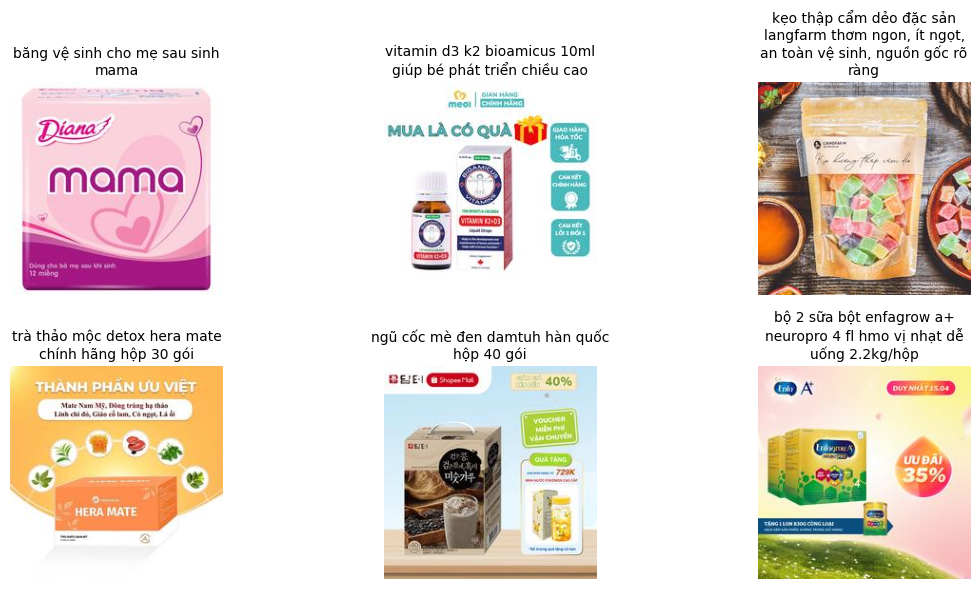

In [5]:
plot_img(images[:6], titles=titles[:6], ncols=3, figsize=(12, 6))

In [6]:
file_embed = path / "siglip_embeds.npy"
df_match_siglip = create_search_result(path=path, file_embed=file_embed, data=df)

(78265, 768)


  0%|          | 0/1 [00:00<?, ?it/s]


In [7]:
file_embed = path / "dinov2_embeds.npy"
df_match_dino = create_search_result(path=path, file_embed=file_embed, data=df)

(78265, 768)


  0%|          | 0/1 [00:00<?, ?it/s]


In [8]:
df_match_dino.tail(5)

item_id,item_name,item_name_clean,level1_global_be_category,file_path,embed,db_item_id,db_item_name,db_item_name_clean,db_level1_global_be_category,db_file_path,score
i64,str,str,str,str,"array[f32, 768]",list[i64],list[str],list[str],list[str],list[str],list[f32]
27219053422,"""Mì Dinh Dưỡng Khoai Tây Omachi…","""mì dinh dưỡng khoai tây omachi…","""Food & Beverages""","""/media/kevin/75b198db-809a-4bd…","[-0.032959, -0.017517, … -0.017609]","[27219053422, 4441015505, … 14162836797]","[""Mì Dinh Dưỡng Khoai Tây Omachi Sườn Hầm Ngũ Quả Phiên Bản Tết - Thùng 16 Gói x 80g"", ""Dầu gội chăm sóc tóc Elastine Silk Repair Perfect Shining Gold Silk 550ml"", … ""Bổ não Healthy Care Ginkgo Biloba Úc 2000 100 viên Tăng Cường Cải Thiện Trí Nhớ""]","[""mì dinh dưỡng khoai tây omachi sườn hầm ngũ quả phiên bản tết thùng 16 gói x 80g"", ""dầu gội chăm sóc tóc elastine silk repair perfect shining gold silk 550ml"", … ""bổ não healthy care ginkgo biloba úc 2000 100 viên tăng cường cải thiện trí nhớ""]","[""Food & Beverages"", ""Beauty"", … ""Health""]","[""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_78000_to_78999/78260_vn-11134201-7ra0g-m6lhrpd911nl03.jpg"", ""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_53000_to_53999/53003_vn-11134201-7ra0g-m89d0kc2kuo430.jpg"", … ""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_9000_to_9999/9444_vn-11134207-7ra0g-m7x8b08a2lim85.jpg""]","[1.000633, 0.606011, … 0.571463]"
26605774786,"""Imagic Hai Đầu Dưới Lông Mi Te…","""imagic hai đầu dưới lông mi te…","""Beauty""","""/media/kevin/75b198db-809a-4bd…","[0.023499, 0.00713, … -0.017334]","[26605774786, 29805548707, … 21794939850]","[""Imagic Hai Đầu Dưới Lông Mi Tem Bút Chống Thấm Nước Trang Điểm Mắt Lâu Dài Bút Kẻ Mắt Không lem Dưới Tem Lông Mi"", ""Bột Matcha Haru Phiên Bản Giới Hạn, Hộp 30G Nhập Khẩu Nhật Bản, Dùng Pha Chế, Trà Đạo, Quà Tặng"", … ""[Livestream] Combo Gội 500ml & Dầu Xả 200ml Absolut Repair dưỡng tóc mềm mượt & phục hồi hư tổn L'Oréal Professionnel""]","[""imagic hai đầu dưới lông mi tem bút chống thấm nước trang điểm mắt lâu dài bút kẻ mắt không lem dưới tem lông mi"", ""bột matcha haru phiên bản giới hạn, hộp 30g nhập khẩu nhật bản, dùng pha chế, trà đạo, quà tặng"", … ""combo gội 500ml & dầu xả 200ml absolut repair dưỡng tóc mềm mượt & phục hồi hư tổn l'oréal professionnel""]","[""Beauty"", ""Food & Beverages"", … ""Beauty""]","[""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_78000_to_78999/78261_cn-11134207-7ras8-m1w40lvp76es92.jpg"", ""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_13000_to_13999/13109_vn-11134207-7ra0g-m6qmqedu22ld8c.jpg"", … ""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_3000_to_3999/3291_vn-11134201-7ras8-m1w7b1krsnnj21.jpg""]","[1.000662, 0.83509, … 0.757834]"
16462747991,"""Sữa Rửa Mặt Da Nhạy Cảm - Da t…","""sữa rửa mặt da nhạy cảm da thư…","""Beauty""","""/media/kevin/75b198db-809a-4bd…","[0.033691, 0.018967, … -0.004566]","[16462747991, 23888306120, … 9947433056]","[""Sữa Rửa Mặt Da Nhạy Cảm - Da thường/ Dưỡng Ẩm MUJI"", ""Tăm chỉ nha khoa làm sạch mảng bám ngăn ngừa hôi miệng Tấm Thị, Hộp 50 chiếc tăm nha khoa làm sạch sâu từng kẽ răng"", … ""Kem dưỡng da Collagen trẻ hóa làn da chống lão hóa giúp làn da không tuổi BEBECO Collagen Super cung cấp độ ẩm 50ml""]","[""sữa rửa mặt da nhạy cảm da thường/ dưỡng ẩm muji"", ""tăm chỉ nha khoa làm sạch mảng bám ngăn ngừa hôi miệng tấm thị, hộp 50 chiếc tăm nha khoa làm sạch sâu từng kẽ răng"", … ""kem dưỡng da collagen trẻ hóa làn da chống lão hóa giúp làn da không tuổi bebeco collagen super cung cấp độ ẩm 50ml""]","[""Beauty"", ""Health"", … ""Beauty""]","[""/media/kevin/75b198db-809a-4bd2-a97c-e52daa6b3a2d/dataset/item_matching/img/img_/batch_78000_to_78999/78262_vn-11134207-7r98o-lwnvtluh25sp99.jpg"", ""/media/kevin/75b198d

In [9]:
dict_dino = df_match_dino.to_dicts()
dict_siglip = df_match_siglip.to_dicts()

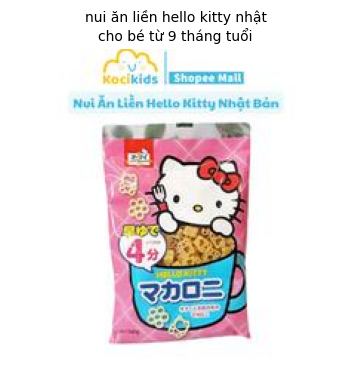

In [10]:
idx = 23499
lst_img = [dict_dino[idx]["file_path"]]
titles = [dict_dino[idx]["item_name_clean"]]
plot_img(lst_img, titles=titles, ncols=1, figsize=(4, 4))

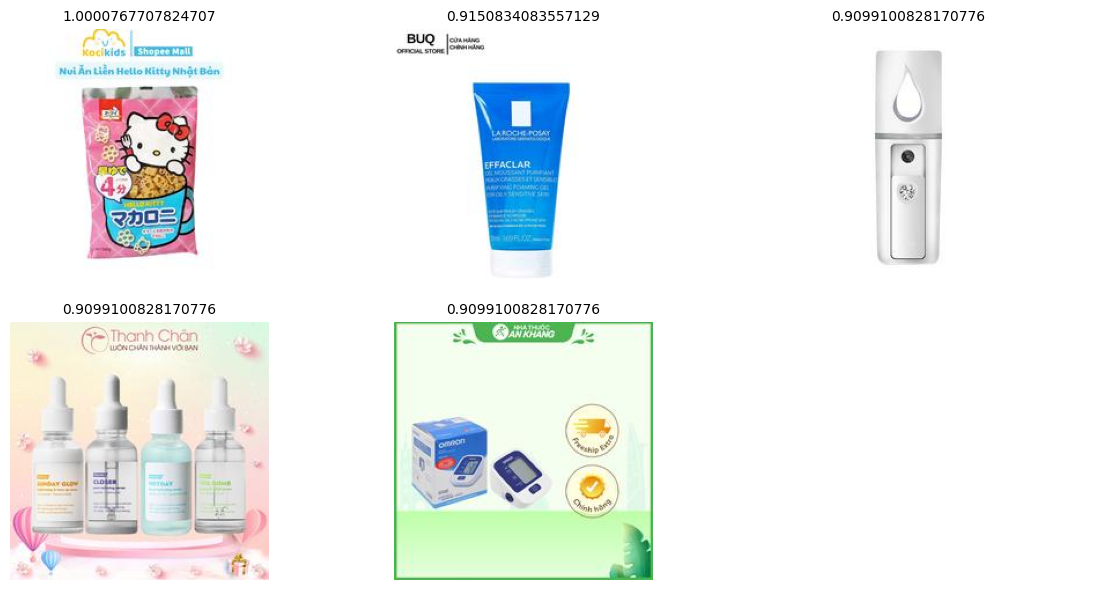

In [11]:
lst_img = dict_dino[idx]["db_file_path"]
titles = dict_dino[idx]["score"]
plot_img(lst_img, titles=titles, ncols=3, figsize=(12, 6))

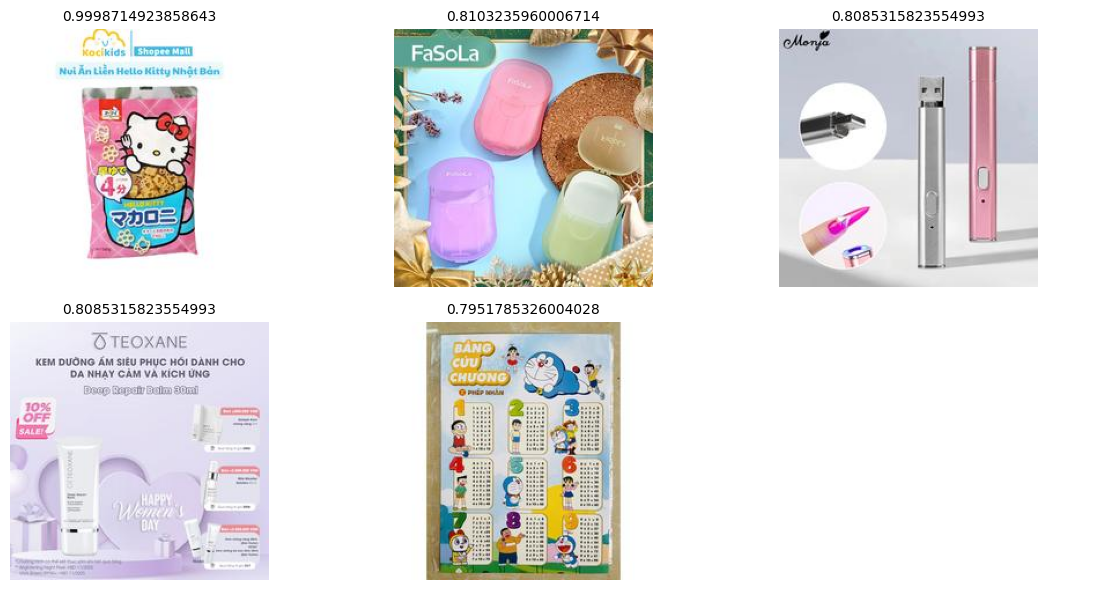

In [12]:
lst_img = dict_siglip[idx]["db_file_path"]
titles = dict_siglip[idx]["score"]
plot_img(lst_img, titles=titles, ncols=3, figsize=(12, 6))